In [28]:
# pandas nos permite manipular el archivo csv https://pandas.pydata.org
import pandas as pd
# numpy nos permite hacer operaciones usando vectores https://numpy.org
import numpy as np
# plotly nos permite crear graficas interactivas https://plotly.com/python/
import plotly.express as px
# matplotlib nos permite graficar bellamente
import matplotlib.pyplot as plt

%matplotlib inline

# Cargamos los datos
df = pd.read_csv('Sample9.csv',delimiter=',')

'''
from IPython.display import display
display(particles.head()) 
'''
print('Número de datos:',len(df))
df.head()

Número de datos: 100000


,Run,Event,type1,E1,px1,py1,pz1,pt1,eta1,phi1,...,type2,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M
0,165617,74601703,G,9.6987,-9.5104,0.3662,1.8633,9.5175,0.1945,3.1031,...,G,9.7633,7.3277,-1.1524,6.3473,7.4178,0.7756,-0.1560,1,17.4922
1,165617,75100943,G,6.2039,-4.2666,0.4565,-4.4793,4.2910,-0.9121,3.0350,...,G,9.6690,7.2740,-2.8211,-5.7104,7.8019,-0.6786,-0.3700,1,11.5534
2,165617,75587682,G,19.2892,-4.2121,-0.6516,18.8121,4.2622,2.1905,-2.9881,...,G,9.8244,4.3439,-0.4735,8.7985,4.3697,1.4497,-0.1086,1,9.1636
3,165617,75660978,G,7.0427,-6.3268,-0.2685,3.0802,6.3325,0.4690,-3.0992,...,G,5.5857,4.4748,0.8489,-3.2319,4.5546,-0.6605,0.1875,1,12.4774
4,165617,75947690,G,7.2751,0.1030,-5.5331,-4.7212,5.5340,-0.7736,-1.5522,...,G,7.3181,-0.3988,6.9408,2.2825,6.9523,0.3227,1.6282,1,14.3159


# Inspección rapida

En una inspección rapida de los datos, podemos observar:

     - 100,000 datos
     - Datos de dimuones debido al tipo 
         - G: muones globales, T: muones con solo trazas.
     - Energia y momentos en cada dirección de cada muon, ademas del momento transversal pt
 Pseudorapidez $\eta$ y angulo $\phi$

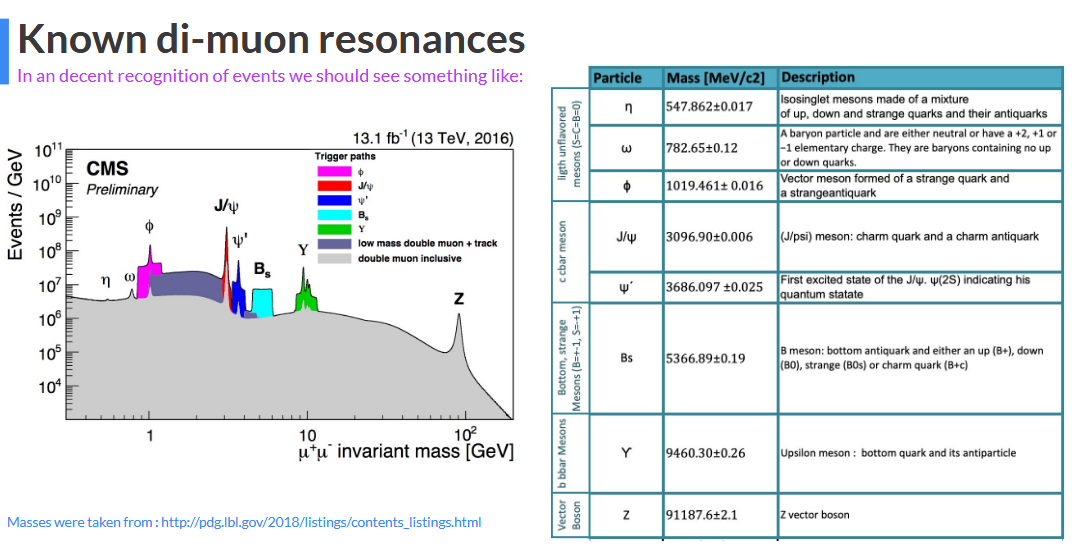

In [29]:
# Masas de particulas resonantes en decaimientos mumu [GeV] 
M_Phi = 1.019461
M_JPsi= 3.096900
M_Psil= 3.686097
M_Bs  = 5.366890
M_Y   = 9.460300
M_Z   = 91.1876

# Limpieza de muones, solamente considerando global $\mu$

In [30]:

mask_mu = (df['type1'] == 'G') & (df['type2'] == 'G')
corte_G = df[mask_mu].copy()

print(len(corte_G))

93474


In [ ]:
plt.hist(corte_G['M'], bins = 10000, color='red')
plt.xlim(0, 3.5)
plt.show()

plt.hist(corte_G['M'], bins = 1000, color='red')
plt.xlim(5, 30)
plt.show()

plt.hist(corte_G['M'], bins = 1000, color='red')
plt.xlim(30, 80)
plt.ylim(0,800)
plt.show()

plt.hist(corte_G['M'], bins = 1000, color='red')
plt.xlim(80, 100)
plt.ylim(0,800)
plt.show()


# Observacion de vars

## Carga Total

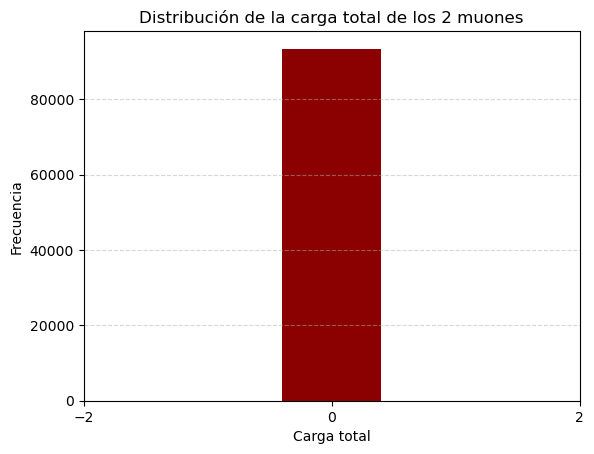

In [31]:
Q_values, counts = np.unique(corte_G['Q1'] + corte_G['Q2'], return_counts=True)


plt.bar(Q_values, counts, color='darkred')

plt.xlabel("Carga total")
plt.ylabel("Frecuencia")
plt.title("Distribución de la carga total de los 2 muones")

plt.xticks([-2, 0, 2])
plt.grid(axis='y', linestyle='--', alpha=0.5)


plt.savefig("tocharge_distribution_inicial.png", dpi=300, bbox_inches='tight') 
plt.show()

## Pseudorapidez

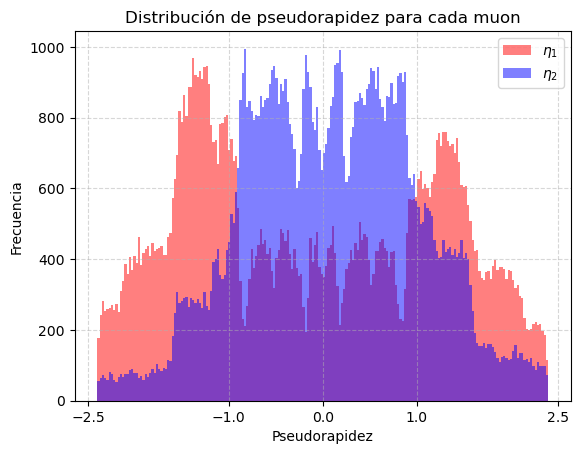

In [32]:
xticks =  [-2.5, -1, 0, 1, 2.5 ]

plt.hist(corte_G['eta1'], bins=200, alpha=0.5, label=r'$\eta_1$', color='red')
plt.hist(corte_G['eta2'], bins=200, alpha=0.5, label=r'$\eta_2$', color='blue')
plt.xlabel('Pseudorapidez')
plt.ylabel("Frecuencia")
plt.title("Distribución de pseudorapidez para cada muon")
plt.xticks(xticks)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

plt.savefig("pseudo_distribution_ini.png", dpi=300, bbox_inches='tight') 
plt.show()

## Phi

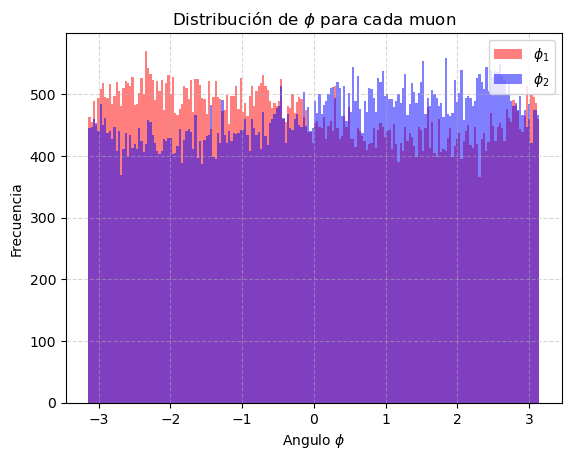

In [33]:

plt.hist(corte_G['phi1'], bins=200, alpha=0.5, label=r'$\phi_1$', color='red')
plt.hist(corte_G['phi2'], bins=200, alpha=0.5, label=r'$\phi_2$', color='blue')
plt.xlabel(r'Angulo $\phi$')
plt.ylabel("Frecuencia")
plt.title(r"Distribución de $\phi$ para cada muon")

plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

plt.savefig("phi_distribution_ini.png", dpi=300, bbox_inches='tight') 
plt.show()



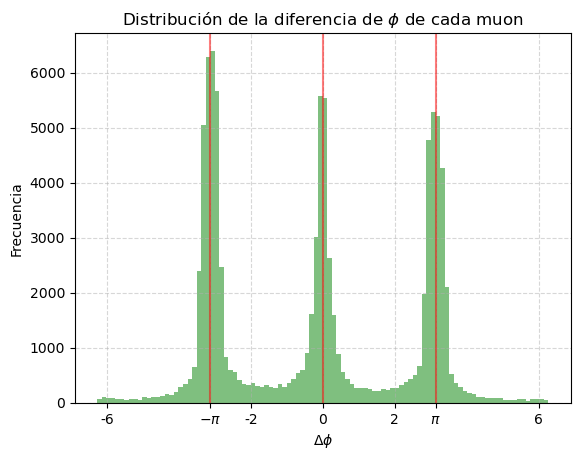

In [34]:
delta_phi = corte_G['phi1'] - corte_G['phi2']

plt.hist(delta_phi, bins=100, alpha=0.5, color='green')
plt.xlabel(r'$\Delta \phi$')
plt.ylabel("Frecuencia")
plt.title(r"Distribución de la diferencia de $\phi$ de cada muon")

# Add vertical lines
plt.axvline(x=np.pi, alpha=0.5, color='red')
plt.axvline(x=-np.pi, alpha=0.5, color='red')
plt.axvline(x=0, alpha=0.5, color='red')

# Get current ticks and add the special ones
current_xticks = [-6, -2, 0, 2, 6]  
special_xticks = [-np.pi, 0, np.pi]  # Ticks to highlight
all_xticks = sorted(set(current_xticks + special_xticks))  # Combine and remove duplicates


# Set all ticks (black), then overwrite special ones (red)
plt.xticks(all_xticks, ['-6', r'$-\pi$', '-2', '0', '2', r'$\pi$', '6'])  # First, apply all ticks

plt.grid(True, linestyle='--', alpha=0.5)
plt.savefig("deltaphi_distribution_ini.png", dpi=300, bbox_inches='tight') 
plt.show()

# Momento

In [ ]:
print(max(corte_G['pt2']))
print(max(corte_G['pt2']))

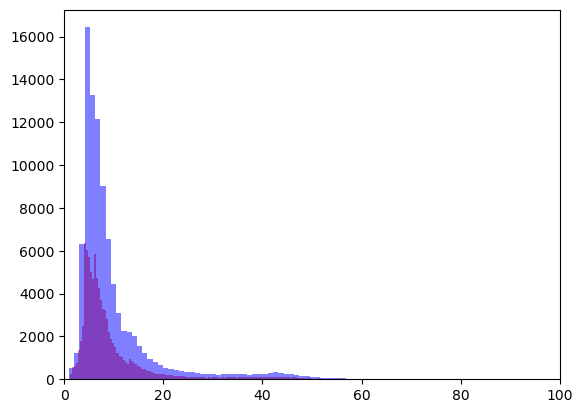

528.434


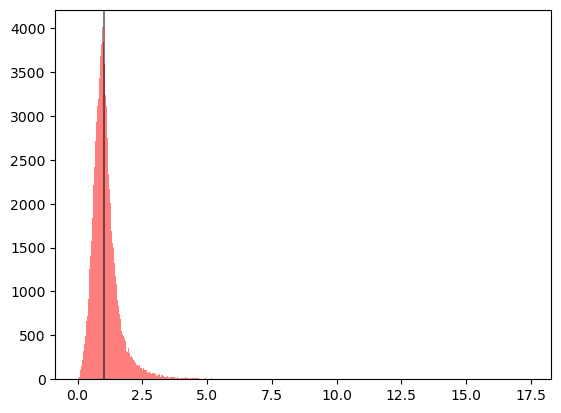

In [102]:
plt.hist(corte_G['pt1'], bins = 500, color='red', alpha = 0.5)
plt.hist(corte_G['pt2'], bins = 500, color='blue', alpha = 0.5)
plt.xlim(0,100)
plt.show()

mask_pt = (df['pt1'] < 100) & (df['pt2'] < 100)
corte_Gpt = df[mask_pt & mask_mu].copy()

ratio_pt = corte_G['pt1']/corte_G['pt2']

plt.hist(ratio_pt, bins = 500, color='red', alpha = 0.5)
plt.axvline(x=1, alpha= 0.5, c='black')
plt.show()


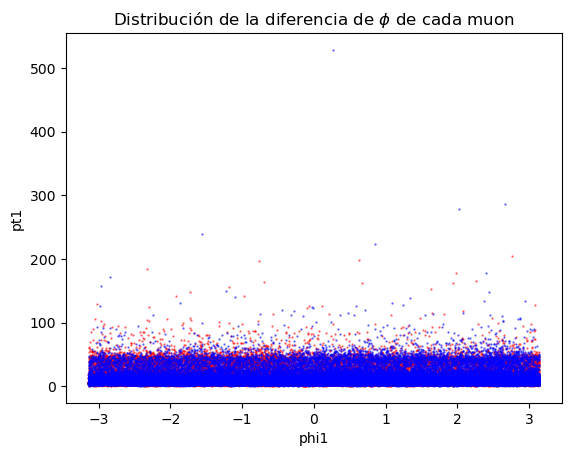

In [76]:
plt.scatter(corte_G['phi1'], corte_G['pt1'], s=0.5, alpha = 0.5, c='red')
plt.scatter(corte_G['phi2'], corte_G['pt2'], s=0.5, alpha = 0.5, c='blue')
plt.xlabel(r'phi1')
plt.ylabel('pt1')
plt.title(r"Distribución de la diferencia de $\phi$ de cada muon")
plt.show()

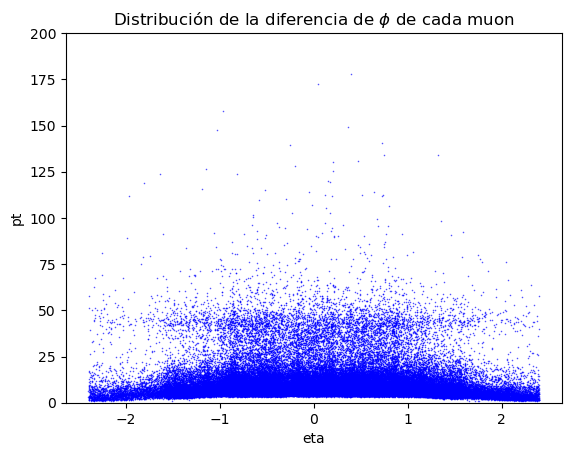

In [91]:
#plt.scatter(corte_G['eta1'], corte_G['pt1'], lw=0.5, s=0.5, alpha = 0.5, c='red')
plt.scatter(corte_G['eta2'], corte_G['pt2'], lw=0.5, s=0.5, alpha = 0.5, c='blue')
plt.xlabel(r'eta')
plt.ylabel('pt')
plt.title(r"Distribución de la diferencia de $\phi$ de cada muon")
plt.ylim(0,200)
plt.show()

## Masa transversal

In [97]:
Et1 = corte_G['E1']/np.cosh(corte_G['eta1'])
Et2 = corte_G['E2']/np.cosh(corte_G['eta2'])

et1 = np.sqrt(corte_G['E1']**2  - corte_G['pt1']**2)
et2 = np.sqrt(corte_G['E2']**2  - corte_G['pt2']**2)


Mt = 2*(et1*et2 - corte_G['pt1']*corte_G['pt2'])

print(max(Mt))

338927.4853888613


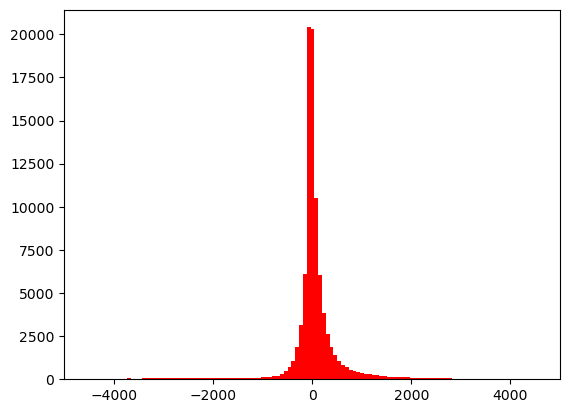

In [101]:
plt.hist(Mt, bins = 5000, color='red')
plt.xlim(-5000,5000)
plt.show()
